<a href="https://colab.research.google.com/github/jess-99/currency-identifier/blob/main/multi_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow is a Python library for fast numerical computing created and released by Google. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

In [ ]:
pip install tensorflow==2.2.0

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

# Accessing My Google Drive
drive.mount('/content/drive')  # access my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Keras is an open-source library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. ... Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible

In [ ]:
pip install keras


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
target_size=(256,256) #provided by network resizing

Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize. Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class

In [ ]:
#bast5dm el swar 3shan a3mlha zoom in w out w rescale 3shan a5od mnha kol el positions 
#ll validation w el training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#ba2sm el swar w b7dd el directory bt3o w b7dd el batch size 

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/datasets',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/datasets', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
train_generator.image_shape # bcheck 3la el shape

(256, 256, 3)

In [ ]:
train_generator.class_indices #bcheck 3la el classes el training

{'dollar': 0, 'euro': 1}

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
     tf.keras.layers.Dense(2, activation='softmax')
])

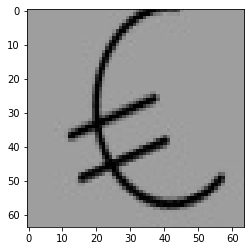

In [ ]:
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro104.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro104.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration

In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label

In [ ]:
EPOCHS = 20
INIT_LR = 1e-3
BS = 32

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)],
        epochs=20,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/20
25/25 [==============================] - 26s 1s/step - loss: 0.5361 - accuracy: 0.7750 - val_loss: 0.5873 - val_accuracy: 0.6797
Epoch 2/20
25/25 [==============================] - 26s 1s/step - loss: 0.1911 - accuracy: 0.9350 - val_loss: 0.2538 - val_accuracy: 0.9167
Epoch 3/20
25/25 [==============================] - 26s 1s/step - loss: 0.0694 - accuracy: 0.9731 - val_loss: 0.1701 - val_accuracy: 0.9453
Epoch 4/20
25/25 [==============================] - 26s 1s/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.1602 - val_accuracy: 0.9740
Epoch 5/20
25/25 [==============================] - 26s 1s/step - loss: 0.0279 - accuracy: 0.9900 - val_loss: 0.1997 - val_accuracy: 0.9505
Epoch 6/20
25/25 [==============================] - 26s 1s/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0700 - val_accuracy: 0.9844
Epoch 7/20
25/25 [==============================] - 26s 1s/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0492 - val_accuracy: 0.9818
Epoch 8/20
25/25 [==

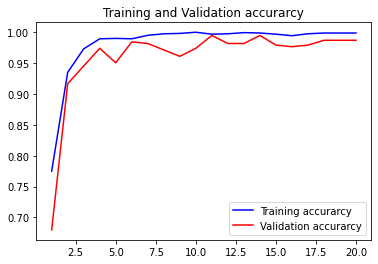

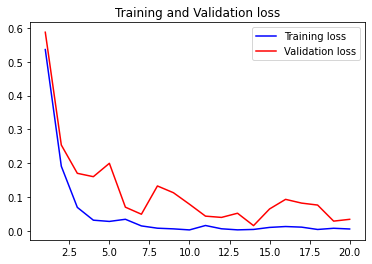

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('Catvsdogs1.h5')

In [ ]:
model.save_weights('Catvsdogs_weights.h5')


In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'dollar': 0, 'euro': 1}

In [ ]:


Classes = ["Dollar","Euro"]


In [ ]:
pip install tensorflow

Dollar


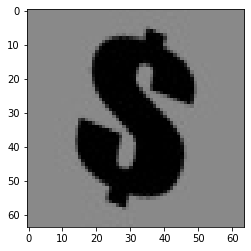

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Pre-Processing test data same as train data.
img_width=256
img_height=256


from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/dollar/dollar117.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/dollar/dollar117.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Euro


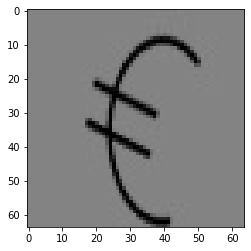

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/euro/euro105.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro105.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Euro


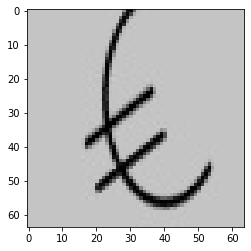

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/euro/euro128.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro128.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Dollar


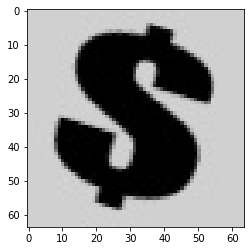

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/dollar/dollar116.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/dollar/dollar116.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Dollar


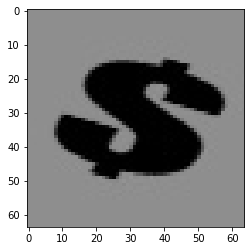

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/dollar/dollar135.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/dollar/dollar135.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Dollar


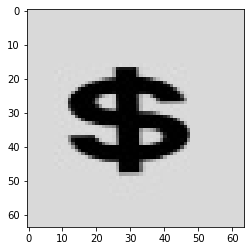

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/dollar/dollar17.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/dollar/dollar17.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Euro


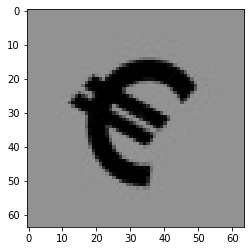

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/euro/euro225.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro225.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Euro


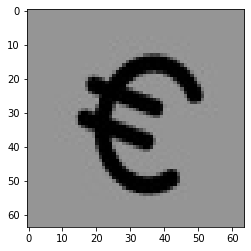

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/euro/euro312.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro312.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Euro


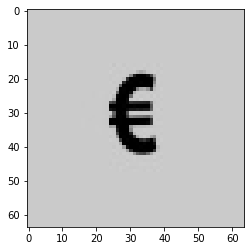

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/euro/euro375.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro375.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Dollar


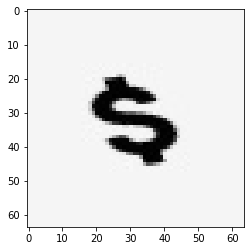

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/dollar/dollar959.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/dollar/dollar959.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

Euro


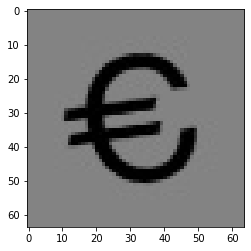

In [ ]:
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/datasets/datasets/euro/euro999.jpg')])
Animal=image.load_img('/content/drive/MyDrive/datasets/datasets/euro/euro999.jpg')
plt.imshow(Animal)
print (Classes[int(result)])